**Euclidean Distance Formula**


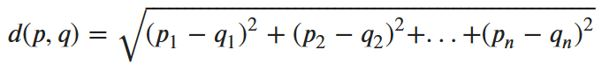

In [1]:
import os
from IPython.display import Image
print("**Euclidean Distance Formula**")
Image(filename="Euclidean_distance.JPG", width= 500, height=200)

In [20]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, classification_report, accuracy_score
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

location = "diabetes.csv"
data = pd.read_csv(location)
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [ ]:
# Manipulating and Cleaning our dataset

# In this section , we will attempt to clean our dataset from al zeros and missing values such as NaN , and replace them with the mean of the designated columns. I ‘ve decided to use a specific number of columns to do the cleaning as these subjected columns which are mentioned as following 


# ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Pedigree'] , 


# because they are the most important data with a visible impact which determine if a patient is diabetic or not .

In [3]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# Cleaning the dataset

cols_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for i in cols_clean:
    data[i] = data[i].replace(0, np.NaN)
    cols_mean = int(data[i].mean(skipna = True))
    data[i] = data[i].replace(np.NaN, cols_mean)

data1 = data.copy()
data1.head().style.highlight_max(color = "blue").highlight_min(color = "red")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148.000000,72.000000,35.000000,155.000000,33.600000,0.627000,50,1
1,1,85.000000,66.000000,29.000000,155.000000,26.600000,0.351000,31,0
2,8,183.000000,64.000000,29.000000,155.000000,23.300000,0.672000,32,1
3,1,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21,0
4,0,137.000000,40.000000,35.000000,168.000000,43.100000,2.288000,33,1


In [6]:
data1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.682292,72.386719,29.108073,155.28125,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.435999,12.096642,8.791221,85.02155,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.00000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.50000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,155.00000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.00000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.00000,67.100000,2.420000,81.000000,1.000000


# Plotting the dataset

##### The diabetes updated dataset is ready for a basic plotting, in order to see how would our data looks like, also plotting at this stage will help me decide which column I will choose to run a K-nearest neighbour (KNN) experiment. For plotting I’ve used pairplot() function with the help of Seaborn library , that will give me a range of graph plotting for each group of data presented in the dataset .

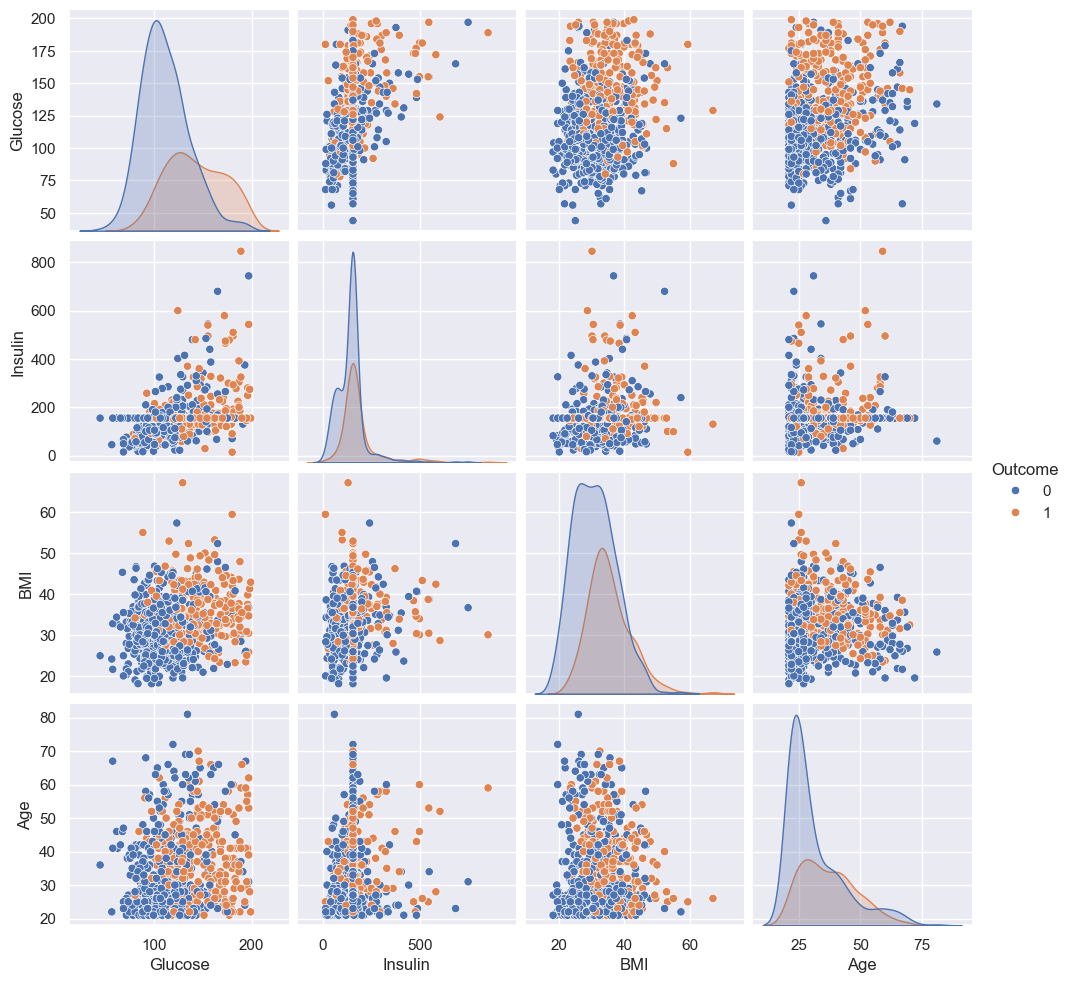

In [7]:
graph = ['Glucose', 'Insulin', 'BMI', 'Age', 'Outcome']

sns.set()
print(sns.pairplot(data1[graph], hue = 'Outcome', diag_kind = 'kde'))

#### It's obvious we are dealing with a rich multideminsional dataset with many data points belong to the presented variables. To make our life easier and for simplicity , we will select only a few variables to test our model.

In [8]:
# For Simplicity and analysing the most relevant data

q_cols = ['Glucose', 'Insulin', 'BMI', 'Outcome']

df = data1[q_cols]
df.head(2)

,Glucose,Insulin,BMI,Outcome
0,148.0,155.0,33.6,1
1,85.0,155.0,26.6,0


# Splitting the dataset into training and testing dataset

#### A particularly important part of machine learning modelling or preparing data for machine learning algorithms is splitting our dataset into training and testing datasets.

#### Mainly , datasets undergo a splitting process for the purpose of testing the model , the testing process will determine how accurate your machine learning algorithm in predicting every testing sets against training sets, and how that will take shape in the real world. Then , we take the presented data and compute the accuracy rate of the Machine learning algorithm. Ideally , the higher the accuracy rate of your machine learning algorithm the better is your model in predicting presented sample data.

In [9]:
split = 0.75
total_len = len(df)
split_df = int(total_len*split)

train, test = df.iloc[:split_df, 0:4], df.iloc[split_df:, 0:4]

train_x = train[['Glucose', 'Insulin', 'BMI']]
train_y = train['Outcome']
test_x = test[['Glucose', 'Insulin', 'BMI']]
test_y = test['Outcome']

In [10]:
a = len(train_x)
b = len(test_x)

print('Training data = ', a, '\n',
      'Testing Data = ', b, '\n',
      'Total data length = ', a+b)

Training data =  576 
 Testing Data =  192 
 Total data length =  768


#### Knn algorithm dealing with similarity between the sample test data and training data. This similarity is determined by K values , These values are defined by the closest data to the sample data points in this case , we will use two distance measurement to get the closest distances between our test data and the training dataset . The chosen distance measurement in this exercise is the Euclidean distance, However , I used a build-in library to run these operations on the model , the library I used was scikit-learn library.

# KNN function

#### I wrote a function to populate the result of adopting KNN algorithm against the split data. This function will run the KNN algorithm K times and populate the result in a form of Lines plot .

In [11]:
def knn(x_train, y_train,x_test, y_test, n):
    n_range = range(1, n)
    results = []
    for n in n_range:
        knn = KNeighborsClassifier(n_neighbors = n)
        knn.fit(x_train, y_train)

        # Predict the response for test dataset
        predict_y = knn.predict(x_test)
        accuracy = metrics.accuracy_score(y_test, predict_y)

        results.append(accuracy)
    
    return results



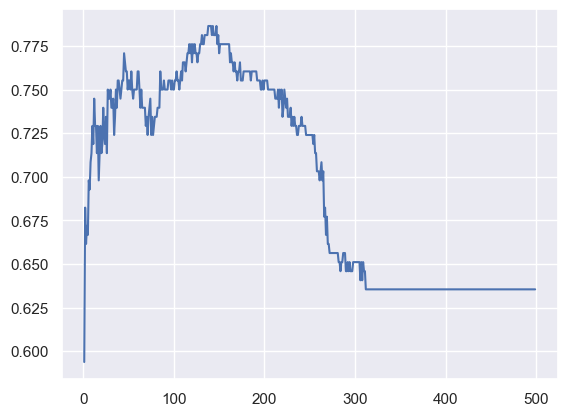

In [12]:
n = 500

output = knn(train_x, train_y, test_x, test_y, n)
n_range = range(1, n)
plt.plot(n_range, output)

In [28]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(train_x, train_y)

y_pred = knn.predict(test_x)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [29]:
print(confusion_matrix(y_pred, test_y))

[[97 29]
 [25 41]]


In [30]:
print(accuracy_score(y_pred, test_y))

0.71875


In [31]:
print(classification_report(y_pred, test_y))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78       126
           1       0.59      0.62      0.60        66

    accuracy                           0.72       192
   macro avg       0.69      0.70      0.69       192
weighted avg       0.72      0.72      0.72       192



# Visualize the KNN

In [21]:
data1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

In [25]:
Feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                    'BMI', 'Pedigree', 'Age']
Target_columns = ['Outcome']

X = data1[Feature_columns]
Y = data1[Target_columns]


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=1)

ValueError: Filler values must be provided when X has more than 2 training features.

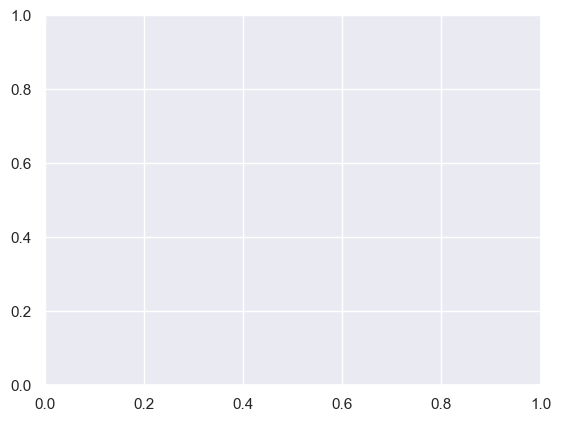

In [34]:
X_np = X.values
Y_np = Y.values.ravel()

plot_decision_regions(X_np, Y_np, clf = knn, legend = 1)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('KNN with K=125')

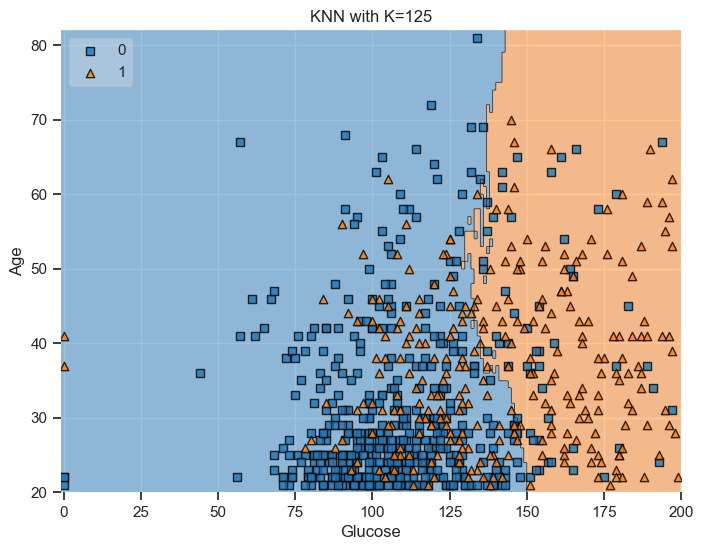

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Select only two features for visualization
Feature1 = 'Glucose'
Feature2 = 'Age'
Feature_columns = [Feature1, Feature2]
Target_column = 'Outcome'

X = data[Feature_columns].values        # Convert to NumPy array
Y = data[Target_column].values          # 1D NumPy array

# Split data for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=1)

# Fit KNN classifier
knn = KNeighborsClassifier(n_neighbors=125)
knn.fit(X_train, Y_train)

# Plot decision regions
plt.figure(figsize=(8, 6))
plot_decision_regions(X, Y, clf=knn, legend=2)

plt.xlabel(f'{Feature1}')
plt.ylabel(f'{Feature2}')
plt.title('KNN with K=125')
plt.show()
